In [1]:
# working on MMT plots only
# HgHbHa_Plotting

In [2]:
import numpy as np, matplotlib.pyplot as plt
from analysis.sdf_spectra_fit import find_nearest, get_best_fit, get_best_fit2, get_best_fit3
from analysis.sdf_stack_data import stack_data
from create_ordered_AP_arrays import create_ordered_AP_arrays
from astropy.io import fits as pyfits, ascii as asc
from astropy.table import Table
%matplotlib inline

In [3]:
def get_name_index_matches(*args, **kwargs):
    '''
    Returns the indexes from which the kwargs name is in the ordered NAME0
    array and the kwargs instr is in the ordered inst_dict dict.
    '''
    namematch = kwargs['namematch']
    instr     = kwargs['instr']
    index = np.array([x for x in range(len(NAME0)) if namematch in NAME0[x] and
                      inst_str0[x] in inst_dict[instr]])
    return index
#enddef

In [4]:
def correct_instr_AP(indexed_AP, indexed_inst_str0, instr):
    '''
    Returns the indexed AP_match array based on the 'match_index' from
    plot_MMT/Keck_Ha
    '''
    for ii in range(len(indexed_inst_str0)):
        if indexed_inst_str0[ii]=='merged,':
            if instr=='MMT':
                indexed_AP[ii] = indexed_AP[ii][:5]
            elif instr=='Keck':
                indexed_AP[ii] = indexed_AP[ii][6:]
        #endif
    #endfor
    return indexed_AP
#enddef

In [5]:
full_path = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'
good_NB921_Halpha = ['S.245','S.278','S.291','S.306','S.308','S.333','S.334',
                     'S.350','S.364','A.134','D.076','D.099','D.123','D.125',
                     'D.127','D.135','D.140','D.215','D.237','D.298']
inst_dict = {}
inst_dict['MMT'] = ['MMT,FOCAS,','MMT,','merged,','MMT,Keck,']
inst_dict['Keck'] = ['merged,','Keck,','Keck,Keck,','Keck,FOCAS,',
                     'Keck,FOCAS,FOCAS,','Keck,Keck,FOCAS,']
tol = 3 #in angstroms, used for NII emission flux calculations

nbia = pyfits.open(full_path+'Catalogs/python_outputs/nbia_all_nsource.fits')
nbiadata = nbia[1].data
NAME0 = nbiadata['source_name']

zspec = asc.read(full_path+'Catalogs/nb_ia_zspec.txt',guess=False,
                 Reader=asc.CommentedHeader)
slit_str0 = np.array(zspec['slit_str0'])
inst_str0 = np.array(zspec['inst_str0'])

fout  = asc.read(full_path+'FAST/outputs/NB_IA_emitters_allphot.emagcorr.ACpsf_fast.fout',
                 guess=False,Reader=asc.NoHeader)
stlr_mass = np.array(fout['col7'])

data_dict = create_ordered_AP_arrays()
AP = data_dict['AP']
HA_Y0 = data_dict['HA_Y0']
HB_Y0 = data_dict['HB_Y0']
HG_Y0 = data_dict['HG_Y0']

print '### looking at the MMT grid'
griddata = asc.read(full_path+'Spectra/spectral_MMT_grid_data.txt',guess=False)
gridz  = np.array(griddata['ZSPEC'])
gridap = np.array(griddata['AP'])
grid   = pyfits.open(full_path+'Spectra/spectral_MMT_grid.fits')
grid_ndarr = grid[0].data
grid_hdr   = grid[0].header
CRVAL1 = grid_hdr['CRVAL1']
CDELT1 = grid_hdr['CDELT1']
NAXIS1 = grid_hdr['NAXIS1']
x0 = np.arange(CRVAL1, CDELT1*NAXIS1+CRVAL1, CDELT1)

### done reading input files
### creating ordered AP arr
### done creating ordered AP arr
### creating ordered HA,HB,HG_Y0 arr
### done creating ordered HA,HB,HG_Y0 arrays
### looking at the MMT grid


In [10]:
def foo_plot(ax, xval, yval, label, subtitle):
    ax.plot(xval, yval/1E-17, zorder=2)
    
    flux = 0
    flux2 = 0
    flux3 = 0
    pos_flux = 0
    o1 = 0
    o2 = 0
    o3 = 0

    if 'alpha' in label:
        o1 = get_best_fit(xval, yval, label)
        ax.plot(xval, (o1[3]+o1[0]*np.exp(-0.5*((xval-o1[1])/o1[2])**2))/1E-17,
                'r--', zorder=3)
        
        flux = np.sum(dlambda * (o1[0]*np.exp(-0.5*((xval-o1[1])/o1[2])**2)))
        pos_flux = flux

        if subtitle=='NB973':
            flux2 = 0
            flux3 = 0
        else: #elif subtitle!='NB973':
            peak_idx2_left  = find_nearest(xval, 6548.1-tol)
            peak_idx2_right = find_nearest(xval, 6548.1+tol)
            xval2=xval[peak_idx2_left:peak_idx2_right]
            yval2=yval[peak_idx2_left:peak_idx2_right]
            o2 = get_best_fit2(xval2, yval2, 6548.1, label)
            flux2 = np.sum(dlambda * (o2[0]*np.exp(-0.5*((xval2-o2[1])/o2[2])**2)))
            ax.plot(xval2, (o2[3]+o2[0]*np.exp(-0.5*((xval2-o2[1])/o2[2])**2))/1E-17, 'g,', zorder=3)

            peak_idx3_left  = find_nearest(xval, 6583.6-tol)
            peak_idx3_right = find_nearest(xval, 6583.6+tol)
            xval3=xval[peak_idx3_left:peak_idx3_right]
            yval3=yval[peak_idx3_left:peak_idx3_right]
            o3 = get_best_fit2(xval3, yval3, 6583.6, label)
            flux3 = np.sum(dlambda * (o3[0]*np.exp(-0.5*((xval3-o3[1])/o3[2])**2)))
            ax.plot(xval3, (o3[3]+o3[0]*np.exp(-0.5*((xval3-o3[1])/o3[2])**2))/1E-17, 'g,', zorder=3)
    else:
        o1 = get_best_fit3(xval, yval, label)
        pos0 = o1[6]+o1[0]*np.exp(-0.5*((xval-o1[1])/o1[2])**2)
        neg0 = o1[3]*np.exp(-0.5*((xval-o1[4])/o1[5])**2)
        func0 = pos0 + neg0
        ax.plot(xval, func0/1E-17, 'r--', zorder=3)
        
        idx_small = np.where(np.absolute(xval - o1[1]) <= 2.5*o1[2])[0]

        pos_flux = np.sum(dlambda * (pos0[idx_small] - o1[6]))
        flux = np.sum(dlambda * (func0[idx_small] - o1[6]))
        flux2 = 0
        flux3 = 0
    #endif

    ax.set_xlim(xmin0, xmax0)
    ax.set_ylim(ymin=0)
    
    return ax, flux, flux2, flux3, pos_flux, o1, o2, o3

In [22]:
def subplots_setup(ax, plt, label, subtitle, num, pos_flux=0, flux=0):
    ax.text(0.03,0.97,label,transform=ax.transAxes,fontsize=7,ha='left',
            va='top')
    
    if not (subtitle=='NB973' and num%3==2):
        ax.text(0.97,0.97,'flux_before='+'{:.4e}'.format((pos_flux))+
            '\nflux='+'{:.4e}'.format((flux)),transform=ax.transAxes,fontsize=7,ha='right',va='top')
    if num%3==0:
        ax.set_title(subtitle,fontsize=8,loc='left')
    elif num%3==2 and subtitle!='NB973':
        ymaxval = max(ax.get_ylim())
        plt.setp([a.set_ylim(ymax=ymaxval) for a in ax_list[num-2:num]])
        ax_list[num-2].plot([4341,4341],[0,ymaxval],'k',alpha=0.7,zorder=1)
        ax_list[num-2].plot([4363,4363],[0,ymaxval],'k:',alpha=0.4,zorder=1)
        ax_list[num-1].plot([4861,4861],[0,ymaxval],'k',alpha=0.7,zorder=1)
        ax_list[num].plot([6563,6563], [0,ymaxval],'k',alpha=0.7,zorder=1)
        ax_list[num].plot([6548,6548],[0,ymaxval], 'k:',alpha=0.4,zorder=1)
        ax_list[num].plot([6583,6583],[0,ymaxval], 'k:',alpha=0.4,zorder=1)
    elif subtitle=='NB973' and num%3==1:
        ymaxval = max(ax.get_ylim())
        plt.setp([a.set_ylim(ymax=ymaxval) for a in ax_list[num-1:num]])
        ax_list[num-1].plot([4341,4341],[0,ymaxval],'k',alpha=0.7,zorder=1)
        ax_list[num-1].plot([4363,4363],[0,ymaxval],'k:',alpha=0.4,zorder=1)
        ax_list[num].plot([4861,4861],[0,ymaxval],'k',alpha=0.7,zorder=1)
    #endif
    
    return ax, plt
#enddef

In [12]:
def final_plot_setup(f, plt):
    f.suptitle(r'MMT detections of H$\alpha$ emitters', size=15)
    
    plt.setp([a.get_xticklabels() for a in f.axes[:]], size='6')
    plt.setp([a.get_yticklabels() for a in f.axes[:]], size='6')
    plt.setp([a.minorticks_on() for a in f.axes[:]])
        
    f.subplots_adjust(wspace=0.2)
    f.subplots_adjust(hspace=0.2)
    
    return f, plt
#enddef

H$\gamma$ (26) NB704
4281 4401
## zspec :  0.0677 0.0781
[  5.59618005e-15   6.34980174e-15   2.06742327e-15   5.53481135e-15
   2.09747973e-15   9.22535604e-15   2.58347897e-15   5.93706626e-15
   1.36757017e-15   4.27515014e-15   1.24598060e-15   6.84767309e-15
   7.96966847e-15  -3.05361495e-16   1.40549784e-15   7.92667564e-15
   1.03159084e-15   3.85732199e-15   1.81294177e-14   2.55139208e-16]
ValueError: none exist
H$\beta$ (26) NB704
4801 4921
## zspec :  0.0677 0.0781
[  6.25760315e-15   6.31596980e-15   2.10874261e-15   5.67868735e-15
   2.24189622e-15   9.15474743e-15   1.64413094e-15   5.53755267e-15
   1.72672648e-15   5.06295969e-15   8.14104525e-16   6.98773482e-15
   8.35303841e-15  -7.06464215e-16   2.17381949e-15   7.52721035e-15
   8.54414251e-16   3.89840347e-15   1.83907288e-14  -1.78480856e-17]
ValueError: none exist
H$\alpha$ (25) NB704
6503 6623
## zspec :  0.0677 0.0781
[  7.06249803e-15   6.58329759e-15   2.56915315e-15   4.75543494e-15
   2.37289899e-15   7.5

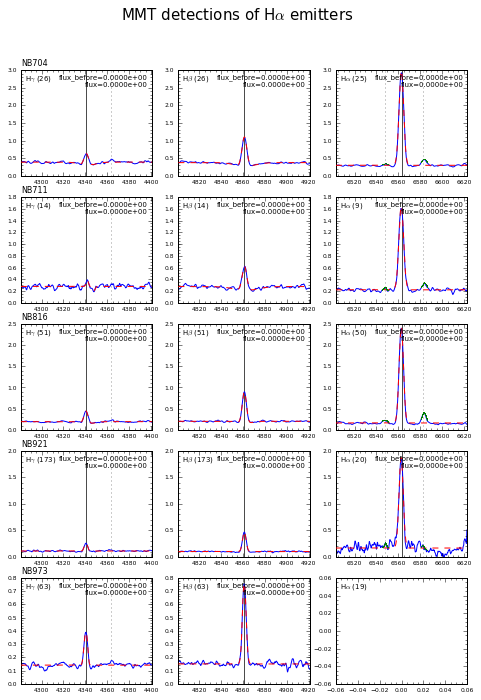

In [23]:
tablenames  = []
tablefluxes = []
nii6548fluxes = []
nii6583fluxes = []
ewlist = []
ewposlist = []
ewneglist = []
ewchecklist = []
medianlist = []
pos_amplitudelist = []
neg_amplitudelist = []
index_0 = get_name_index_matches(namematch='Ha-NB704',instr='MMT')
index_1 = get_name_index_matches(namematch='Ha-NB711',instr='MMT')
index_2 = get_name_index_matches(namematch='Ha-NB816',instr='MMT')
index_3 = get_name_index_matches(namematch='Ha-NB921',instr='MMT')
index_4 = get_name_index_matches(namematch='Ha-NB973',instr='MMT')
index_list = [index_0]*3+[index_1]*3+[index_2]*3+[index_3]*3+[index_4]*3
xmin_list = np.array([4341,4861,6563]*5)-60
xmax_list = np.array([4341,4861,6563]*5)+60
label_list=[r'H$\gamma$',r'H$\beta$',r'H$\alpha$']*5

subtitle_list = ['NB704']*3+['NB711']*3+['NB816']*3+['NB921']*3+['NB973']*3
f, axarr = plt.subplots(5, 3)
f.set_size_inches(8, 11)
ax_list = [axarr[0,0],axarr[0,1],axarr[0,2],axarr[1,0],axarr[1,1],
           axarr[1,2],axarr[2,0],axarr[2,1],axarr[2,2],axarr[3,0],
           axarr[3,1],axarr[3,2],axarr[4,0],axarr[4,1],axarr[4,2]]
num=0
for (match_index0,ax,xmin0,xmax0,label,subtitle) in zip(index_list,ax_list,
                                                        xmin_list,xmax_list,
                                                        label_list, 
                                                        subtitle_list):
    if 'gamma' in label:
        input_norm = HG_Y0[match_index0]
    elif 'beta' in label:
        input_norm = HB_Y0[match_index0]
    elif 'alpha' in label:
        input_norm = HA_Y0[match_index0]
    #endif

    good_index = [x for x in range(len(input_norm)) if
                  input_norm[x]!=-99.99999 and input_norm[x]!=-1
                  and input_norm[x]!=0]
    match_index = match_index0[good_index]
    
    AP_match = correct_instr_AP(AP[match_index], inst_str0[match_index], 'MMT')
    if subtitle=='NB921' and 'alpha' in label:
        good_AP_match = np.array([x for x in range(len(AP_match)) if
                                  AP_match[x] in good_NB921_Halpha])
        AP_match = AP_match[good_AP_match]
    #endif
    input_index = np.array([x for x in range(len(gridap)) if gridap[x] in
                            AP_match],dtype=np.int32)
    
    try:
        label += ' ('+str(len(input_index))+')'
        print label, subtitle
        xval, yval = stack_data(grid_ndarr, gridz, input_index,
            x0, xmin0, xmax0, subtitle)
#         ax.plot(xval, yval/1E-17, zorder=2)

        ax, flux, flux2, flux3, pos_flux, o1, o2, o3 = foo_plot(ax, xval, yval, label, subtitle)
        
        # calculating flux for NII emissions
        zs = np.array(gridz[input_index])
        if subtitle=='NB704' or subtitle=='NB711':
            good_z = np.where(zs < 0.1)[0]
        elif subtitle=='NB816':
            good_z = np.where(zs < 0.3)[0]
        elif subtitle=='NB921':
            good_z = np.where(zs < 0.6)[0]
        else:
            good_z = np.where(zs < 0.6)[0]
        #endif
        zs = np.average(zs[good_z])
        dlambda = (x0[1]-x0[0])/(1+zs)

        ew_emission = 0
        ew_absorption = 0
        ew_check = 0
        median = 0
        pos_amplitude = 0
        neg_amplitude = 0
        if 'alpha' in label:
#             o1 = get_best_fit(xval, yval, label)
#             ax.plot(xval, (o1[3]+o1[0]*np.exp(-0.5*((xval-o1[1])/o1[2])**2))/1E-17,
#                     'r--', zorder=3)

#             flux = np.sum(dlambda * (o1[0]*np.exp(-0.5*((xval-o1[1])/o1[2])**2)))
#             pos_flux = flux

            ew = flux/o1[3]
            ew_emission = ew
            ew_check = ew
            median = o1[3]
            pos_amplitude = o1[0]
            neg_amplitude = 0
#             if subtitle=='NB973':
#                 flux2 = 0
#                 flux3 = 0
#             else:
#                 peak_idx2_left  = find_nearest(xval, 6548.1-tol)
#                 peak_idx2_right = find_nearest(xval, 6548.1+tol)
#                 xval2=xval[peak_idx2_left:peak_idx2_right]
#                 yval2=yval[peak_idx2_left:peak_idx2_right]
#                 o2 = get_best_fit2(xval2, yval2, 6548.1, label)
#                 flux2 = np.sum(dlambda * (o2[0]*np.exp(-0.5*((xval2-o2[1])/o2[2])**2)))
#                 ax.plot(xval2, (o2[3]+o2[0]*np.exp(-0.5*((xval2-o2[1])/o2[2])**2))/1E-17, 'g,', zorder=3)
                
#                 peak_idx3_left  = find_nearest(xval, 6583.6-tol)
#                 peak_idx3_right = find_nearest(xval, 6583.6+tol)
#                 xval3=xval[peak_idx3_left:peak_idx3_right]
#                 yval3=yval[peak_idx3_left:peak_idx3_right]
#                 o3 = get_best_fit2(xval3, yval3, 6583.6, label)
#                 flux3 = np.sum(dlambda * (o3[0]*np.exp(-0.5*((xval3-o3[1])/o3[2])**2)))
#                 ax.plot(xval3, (o3[3]+o3[0]*np.exp(-0.5*((xval3-o3[1])/o3[2])**2))/1E-17, 'g,', zorder=3)
        else:
#             o1 = get_best_fit3(xval, yval, label)
            pos0 = o1[6]+o1[0]*np.exp(-0.5*((xval-o1[1])/o1[2])**2)
            neg0 = o1[3]*np.exp(-0.5*((xval-o1[4])/o1[5])**2)
#             func0 = pos0 + neg0
#             ax.plot(xval, func0/1E-17, 'r--', zorder=3)

#             idx_small = np.where(np.absolute(xval - o1[1]) <= 2.5*o1[2])[0]
            
#             pos_flux = np.sum(dlambda * (pos0[idx_small] - o1[6]))
#             flux = np.sum(dlambda * (func0[idx_small] - o1[6]))
#             flux2 = 0
#             flux3 = 0

            ew = flux/o1[6]
            median = o1[6]
            pos_amplitude = o1[0]
            neg_amplitude = o1[3]

            if (neg_amplitude > 0): 
                neg_amplitude = 0
                ew = pos_flux/o1[6]
                ew_emission = ew
                ew_check = ew
            else:
                pos_corr = np.sum(dlambda * (pos0[idx_small] - o1[6]))
                ew_emission = pos_corr / o1[6]
                neg_corr = np.sum(dlambda * neg0[idx_small])
                ew_absorption = neg_corr / o1[6]
                ew_check = ew_emission + ew_absorption
        #endif
        
#         ax.set_xlim(xmin0, xmax0)
#         ax.set_ylim(ymin=0)

    except ValueError:
        print 'ValueError: none exist'
    #endtry
    
    if not (subtitle=='NB973' and num%3==2):
        tablenames.append(label+'_'+subtitle)
        tablefluxes.append(flux)
        nii6548fluxes.append(flux2)
        nii6583fluxes.append(flux3)
        ewlist.append(ew)
        ewposlist.append(ew_emission)
        ewneglist.append(ew_absorption)
        ewchecklist.append(ew_check)
        medianlist.append(median)
        pos_amplitudelist.append(pos_amplitude)
        neg_amplitudelist.append(neg_amplitude)
    #endif
    
    if pos_flux and flux:
        ax, plt = subplots_setup(ax, plt, label, subtitle, num, pos_flux, flux)
    elif not pos_flux and not flux:
        ax, plt = subplots_setup(ax, plt, label, subtitle, num)
    num+=1
#endfor

f, plt = final_plot_setup(f, plt)

plt.savefig(full_path+'Spectra/Ha_MMT_stacked.pdf')

In [17]:
# #writing the table
# table = Table([tablenames,tablefluxes,nii6548fluxes,nii6583fluxes],
#               names=['type','flux','NII6548 flux','NII6583 flux'])
# asc.write(table, full_path+'Spectra/Ha_MMT_stacked_fluxes.txt',
#           format='fixed_width', delimiter=' ')  

# #writing the EW table
# table0 = Table([tablenames,ewlist,ewposlist,ewneglist,ewchecklist,medianlist,pos_amplitudelist,neg_amplitudelist], 
#     names=['type','EW','EW_corr','EW_abs','ew check','median','pos_amplitude','neg_amplitude'])
# asc.write(table0, full_path+'Spectra/Ha_MMT_stacked_ew.txt', format='fixed_width', delimiter=' ')  

In [57]:
print 'done'
grid.close()

done
